In [6]:
import piplite 
await piplite.install("seaborn") 

In [7]:
# Import required libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
await piplite.install("openpyxl")

In [8]:
# df = pd.read_csv('BankChurners.csv')# To load a CSV dataset file with a specific filename and assign it to a variable called "df".
M1 = pd.ExcelFile('1 - Elite Party Services - M1 - Initial dataset.xlsx')
M2 = pd.ExcelFile('1 - Elite Party Services - M2 - Change Over Time.xlsx')
M3 = pd.ExcelFile('1 - Elite Party Services - M3 - Data Composition.xlsx')
M4 = pd.ExcelFile('1 - Elite Party Services - M4 - Data Distributions.xlsx')
M5 = pd.ExcelFile('1 - Elite Party Services - M5 - Group Comparisons.xlsx')

M1_Data = pd.read_excel(M1, '1 - Elite Party Services - M1')
M2_Data = pd.read_excel(M2, '1 - Elite Party Services - M2')
M3_Data = pd.read_excel(M3, '1 - Elite Party Services - M3')
M4_Data = pd.read_excel(M4, '1 - Elite Party Services - M4')
M5_Data = pd.read_excel(M5, '1 - Elite Party Services - M5')

M1_DD = pd.read_excel(M1, 'Data Dictionary')
M2_DD = pd.read_excel(M2, 'Data Dictionary')
M3_DD = pd.read_excel(M3, 'Data Dictionary')
M4_DD = pd.read_excel(M4, 'Data Dictionary')
M5_DD = pd.read_excel(M5, 'Data Dictionary')

M1_M2 = pd.merge(M1_Data, M2_Data, on="ID")
M1_M2_M3 = pd.merge(M1_M2, M3_Data, on="ID")
M1_M2_M3_M4 = pd.merge(M1_M2_M3, M4_Data, on="ID")
M1_M2_M3_M4_M5 = pd.merge(M1_M2_M3_M4, M5_Data, on="ID")

In [9]:
M1_M2_M3_M4_M5.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Date,Q8,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21
0,1,4,1,9,23,4,1,1,2022-08-18,1,...,6,5,3,2,1,0,2,-2,0,2
1,2,2,2,5,24,4,2,8,2022-05-01,-1,...,3,3,3,2,2,-2,3,0,-2,4
2,3,4,1,9,19,3,9,1,2022-02-19,-1,...,3,1,3,3,1,-2,1,0,0,2
3,4,4,1,9,20,3,2,8,2022-11-05,-2,...,3,1,1,1,1,2,1,-2,-2,0
4,5,3,1,6,24,4,9,1,2022-09-29,1,...,5,2,3,1,1,-1,1,-1,0,3


    eth  cat_-2  cat_-1  cat_0  cat_1  cat_2
0     1       2       0      0      2      0
1     2       0       3      2      3      1
2     3       2       2      4      1      4
3     4       0       4      0      3      0
4     5       4       4      7      7      3
5     6       0       1      3      1      2
6     7       0       1      0      0      0
7     8       1       3      3      0      0
8     9       3       4     10      5      3
9    10      10      21      9     10      3
10   11       0       1      1      0      0


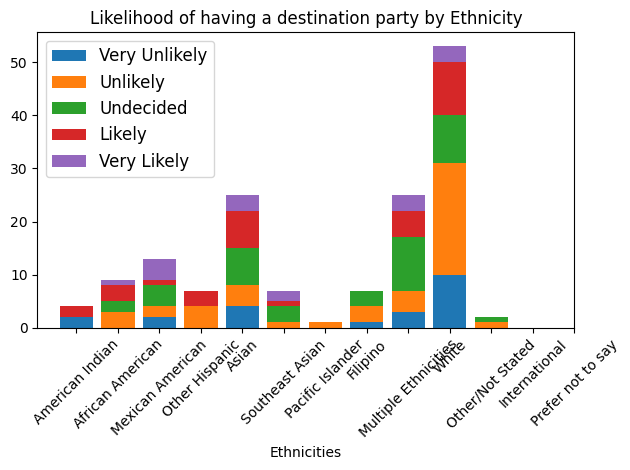

In [51]:
df = M1_M2_M3_M4_M5
x = df['Q3']
y = df['Q17']
grouped_data = df.groupby(['Q3', 'Q17']).size().reset_index(name='count')
ethnicities = grouped_data['Q3'].unique()


ethnicity_data = grouped_data[grouped_data['Q3'] == 1]
q17_values = ethnicity_data['Q17']


nodes = []
for ethnicity in ethnicities:
    node = {
        'eth':ethnicity,
        'cat_-2':0,
        'cat_-1':0,
        'cat_0':0,
        'cat_1':0,
        'cat_2':0
    }
    ethnicity_data = grouped_data[grouped_data['Q3'] == ethnicity]
    for index, row in ethnicity_data.iterrows():
        node['cat_'+str(row['Q17'])] = row['count']
    nodes.append(node)
    cats = ['cat_-2', 'cat_-1', 'cat_0', 'cat_1', 'cat_2']
    vals = {node['cat_-2'], node['cat_-1'], node['cat_0'], node['cat_1'], node['cat_2']}
    # plt.bar(cats, vals, label=node['eth'])
    q17_values = ethnicity_data['Q17']
destination_by_ethnicity = pd.DataFrame(nodes)
print(pd.DataFrame(nodes))

plt.bar(destination_by_ethnicity['eth'], destination_by_ethnicity['cat_-2'])
plt.bar(destination_by_ethnicity['eth'], destination_by_ethnicity['cat_-1'], bottom = destination_by_ethnicity['cat_-2'])
plt.bar(destination_by_ethnicity['eth'], destination_by_ethnicity['cat_0'], bottom = destination_by_ethnicity['cat_-1'] + destination_by_ethnicity['cat_-2'])
plt.bar(destination_by_ethnicity['eth'], destination_by_ethnicity['cat_1'], bottom = destination_by_ethnicity['cat_0'] + destination_by_ethnicity['cat_-1'] + destination_by_ethnicity['cat_-2'])
plt.bar(destination_by_ethnicity['eth'], destination_by_ethnicity['cat_2'], bottom = destination_by_ethnicity['cat_1'] + destination_by_ethnicity['cat_0'] + destination_by_ethnicity['cat_-1'] + destination_by_ethnicity['cat_-2'])
plt.legend(["Very Unlikely", "Unlikely", "Undecided", "Likely", "Very Likely"], loc='upper left', fontsize=12) 
plt.xlabel('Ethnicities')
plt.xticks(range(1, 14), ['American Indian', 'African American', 'Mexican American', 'Other Hispanic', 'Asian', 'Southeast Asian', 'Pacific Islander', 'Filipino', 'Multiple Ethnicities', 'White', 'Other/Not Stated', 'International', 'Prefer not to say'], rotation=45)
plt.title('Likelihood of having a destination party by Ethnicity')
plt.tight_layout()
plt.show()


    eth  cat_-2  cat_-1  cat_0  cat_1  cat_2
0     1       2       1      1      0      0
1     2       1       1      1      5      1
2     3       5       2      3      2      1
3     4       1       3      2      1      0
4     5      10       5      3      5      2
5     6       2       2      2      1      0
6     7       0       0      0      1      0
7     8       2       2      0      3      0
8     9       7       6      6      3      3
9    10      10      17     14      9      3
10   11       1       0      0      1      0


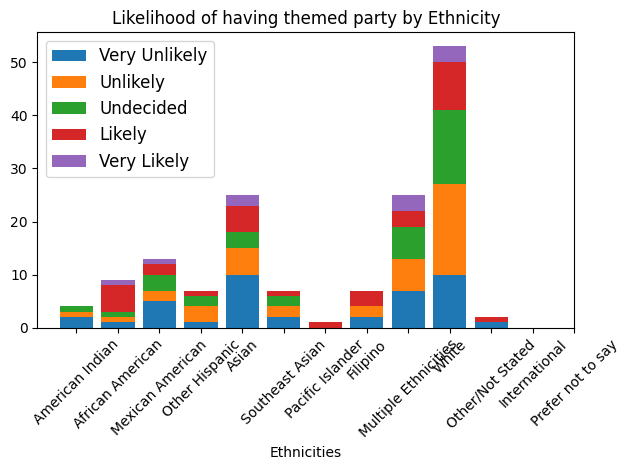

In [52]:
df = M1_M2_M3_M4_M5
x = df['Q3']
y = df['Q19']
grouped_data = df.groupby(['Q3', 'Q19']).size().reset_index(name='count')
ethnicities = grouped_data['Q3'].unique()


ethnicity_data = grouped_data[grouped_data['Q3'] == 1]
q17_values = ethnicity_data['Q19']


nodes = []
for ethnicity in ethnicities:
    node = {
        'eth':ethnicity,
        'cat_-2':0,
        'cat_-1':0,
        'cat_0':0,
        'cat_1':0,
        'cat_2':0
    }
    ethnicity_data = grouped_data[grouped_data['Q3'] == ethnicity]
    for index, row in ethnicity_data.iterrows():
        node['cat_'+str(row['Q19'])] = row['count']
    nodes.append(node)
    cats = ['cat_-2', 'cat_-1', 'cat_0', 'cat_1', 'cat_2']
    vals = {node['cat_-2'], node['cat_-1'], node['cat_0'], node['cat_1'], node['cat_2']}
    # plt.bar(cats, vals, label=node['eth'])
    q17_values = ethnicity_data['Q19']
destination_by_ethnicity = pd.DataFrame(nodes)
print(pd.DataFrame(nodes))

plt.bar(destination_by_ethnicity['eth'], destination_by_ethnicity['cat_-2'])
plt.bar(destination_by_ethnicity['eth'], destination_by_ethnicity['cat_-1'], bottom = destination_by_ethnicity['cat_-2'])
plt.bar(destination_by_ethnicity['eth'], destination_by_ethnicity['cat_0'], bottom = destination_by_ethnicity['cat_-1'] + destination_by_ethnicity['cat_-2'])
plt.bar(destination_by_ethnicity['eth'], destination_by_ethnicity['cat_1'], bottom = destination_by_ethnicity['cat_0'] + destination_by_ethnicity['cat_-1'] + destination_by_ethnicity['cat_-2'])
plt.bar(destination_by_ethnicity['eth'], destination_by_ethnicity['cat_2'], bottom = destination_by_ethnicity['cat_1'] + destination_by_ethnicity['cat_0'] + destination_by_ethnicity['cat_-1'] + destination_by_ethnicity['cat_-2'])
plt.legend(["Very Unlikely", "Unlikely", "Undecided", "Likely", "Very Likely"], loc='upper left', fontsize=12) 
plt.xlabel('Ethnicities')
plt.title('Likelihood of having themed party by Ethnicity')
plt.xticks(range(1, 14), ['American Indian', 'African American', 'Mexican American', 'Other Hispanic', 'Asian', 'Southeast Asian', 'Pacific Islander', 'Filipino', 'Multiple Ethnicities', 'White', 'Other/Not Stated', 'International', 'Prefer not to say'], rotation=45)
plt.tight_layout()
plt.show()


In [57]:
df = M1_M2_M3_M4_M5
x = df['Q3']
y1 = df['Q19']
y2 = df['Q17']

def get_party_type(row):
    party_type = ""
    if row['Q19'] > 0 and row['Q17'] > 0:
        party_type = "Both Destination and Themed"
    elif row['Q19'] > 0:
        party_type = "Themed"
    elif row['Q17'] > 0:
        party_type = "Destination"
    else:
        party_type = "Undecided/uninterested"
    return party_type
    
df['party_type_pref'] = df.apply(get_party_type, axis=1)
# df['party_type_pref']
grouped_data = df.groupby(['Q3', 'party_type_pref']).size().reset_index(name='count')

print(grouped_data)
ethnicities = grouped_data['Q3'].unique()


nodes_dest = []
for ethnicity in ethnicities:
    node = {
        'eth':ethnicity,
        'Both Destination and Themed':0,
        'Themed':0,
        'Destination':0,
        'Undecided/uninterested':0
    }
    ethnicity_data = grouped_data_dest[grouped_data_dest['Q3'] == ethnicity]
    for index, row in ethnicity_data.iterrows():
        node[row['party_type_pref']] = row['count']
    nodes.append(node)
    cats = ['Both Destination and Themed', 'Themed', 'Destination', 'Undecided/uninterested']
    vals = {node['Both Destination and Themed'], node['Themed'], node['Destination'], node['Undecided/uninterested']}
    # plt.bar(cats, vals, label=node['eth'])
party_theme_by_ethnicity = pd.DataFrame(nodes)
print(pd.DataFrame(nodes))

plt.bar(party_theme_by_ethnicity['eth'], party_theme_by_ethnicity['Undecided/uninterested'])
plt.bar(party_theme_by_ethnicity['eth'], party_theme_by_ethnicity['Destination'], bottom = party_theme_by_ethnicity['Undecided/uninterested'])
plt.bar(party_theme_by_ethnicity['eth'], party_theme_by_ethnicity['Themed'], bottom = party_theme_by_ethnicity['Undecided/uninterested'] + party_theme_by_ethnicity['Destination'])
plt.bar(party_theme_by_ethnicity['eth'], party_theme_by_ethnicity['Both Destination and Themed'], bottom = party_theme_by_ethnicity['Undecided/uninterested'] + party_theme_by_ethnicity['Destination'] + party_theme_by_ethnicity['Themed'])
plt.legend(['Undecided/uninterested', "Destination", "Themed", "Both Destination and Themed"], loc='upper left', fontsize=12) 
plt.xlabel('Ethnicities')
plt.title('Party Themes by Ethnicity')
plt.xticks(range(1, 14), ['American Indian', 'African American', 'Mexican American', 'Other Hispanic', 'Asian', 'Southeast Asian', 'Pacific Islander', 'Filipino', 'Multiple Ethnicities', 'White', 'Other/Not Stated', 'International', 'Prefer not to say'], rotation=45)
plt.tight_layout()
plt.show()

    Q3              party_type_pref  count
0    1                  Destination      2
1    1       Undecided/uninterested      2
2    2  Both Destination and Themed      3
3    2                  Destination      1
4    2                       Themed      3
5    2       Undecided/uninterested      2
6    3  Both Destination and Themed      2
7    3                  Destination      3
8    3                       Themed      1
9    3       Undecided/uninterested      7
10   4  Both Destination and Themed      1
11   4                  Destination      2
12   4       Undecided/uninterested      4
13   5  Both Destination and Themed      6
14   5                  Destination      4
15   5                       Themed      1
16   5       Undecided/uninterested     14
17   6  Both Destination and Themed      1
18   6                  Destination      2
19   6       Undecided/uninterested      4
20   7                       Themed      1
21   8                       Themed      3
22   8     

<class 'NameError'>: name 'grouped_data_dest' is not defined